pip install --upgrade pip

pip install pandas

pip install matplotlib

pip install seaborn

pip install scipy

pip install statsmodels

pip freeze > requirements.txt

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create dataframe
df = pd.read_csv('data/us_bank_wages.txt', sep='\t', lineterminator='\n')

In [3]:
# take a look at the data
print(df.head())
df.info()

   Unnamed: 0  SALARY  EDUC  SALBEGIN  GENDER  MINORITY  JOBCAT
0           0   57000    15     27000       1         0       3
1           1   40200    16     18750       1         0       1
2           2   21450    12     12000       0         0       1
3           3   21900     8     13200       0         0       1
4           4   45000    15     21000       1         0       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  474 non-null    int64
 1   SALARY      474 non-null    int64
 2   EDUC        474 non-null    int64
 3   SALBEGIN    474 non-null    int64
 4   GENDER      474 non-null    int64
 5   MINORITY    474 non-null    int64
 6   JOBCAT      474 non-null    int64
dtypes: int64(7)
memory usage: 26.0 KB


In [4]:
# delte first column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# check for duplicates
# this 19 rows could be duplicates. It could also be coincidence that two or more
# people have the same gender, wage...and so on. I will treat this as coincidence
pd.set_option('display.max_rows', 10)
df['dup'] = df.duplicated()
df.query('dup == True').count()

SALARY      19
EDUC        19
SALBEGIN    19
GENDER      19
MINORITY    19
JOBCAT      19
dup         19
dtype: int64

In [6]:
# change to lowercase column names
df.columns = df.columns.str.lower()

In [7]:
df.rename(columns = {'salary': 's_cur','salbegin': 's_beg', 'educ':'years'}, inplace=True)

In [8]:
# change column gender to 'male/female'entries, change dtype to category
#df.gender = df.gender.replace(1,'male')
#df.gender = df.gender.replace(0,'female')
#df.gender.astype("category")

In [9]:
# reorder columns
df = df[['s_beg','s_cur','jobcat','years','gender','minority',]]

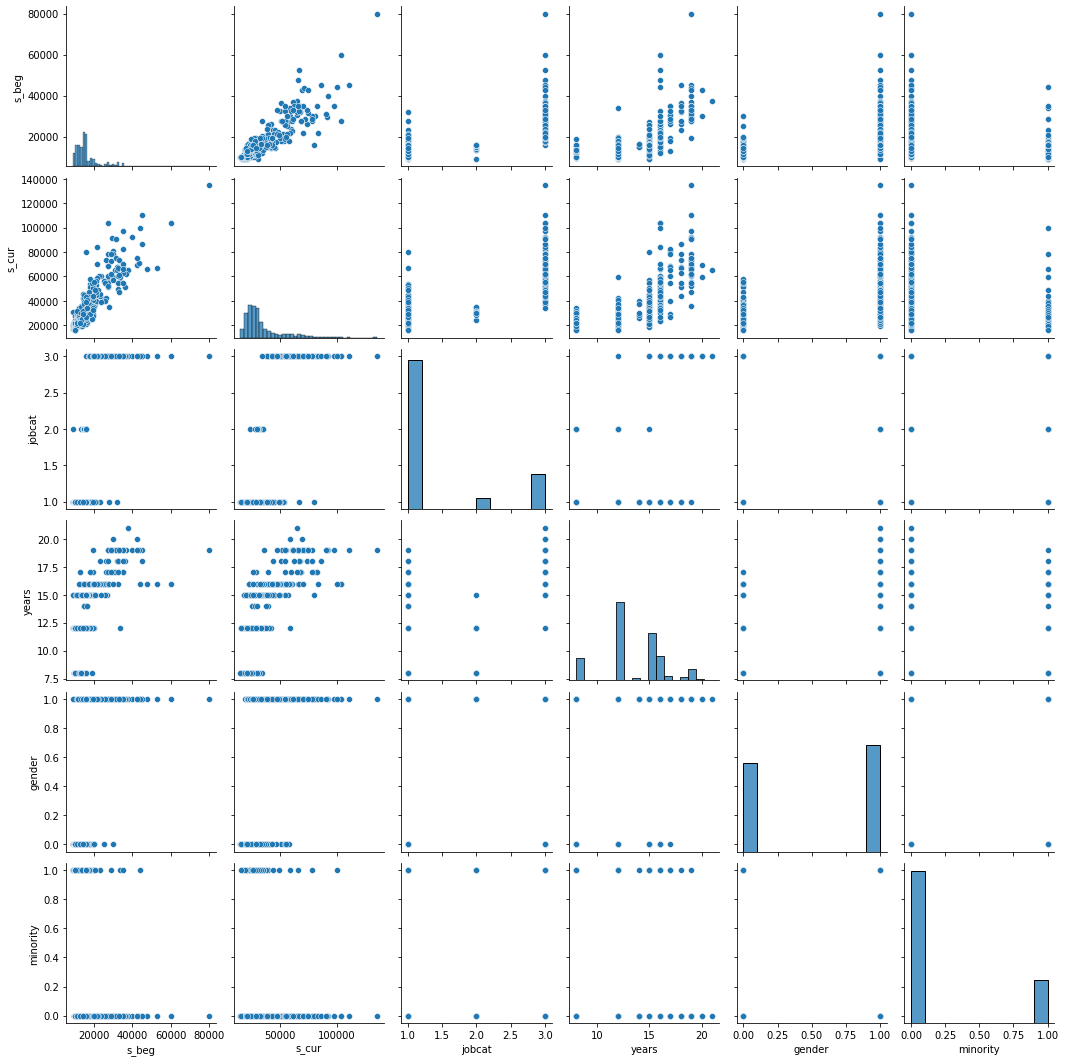

In [10]:
# geting a feeling of the data
sns.pairplot(df)

<AxesSubplot:xlabel='years', ylabel='s_cur'>

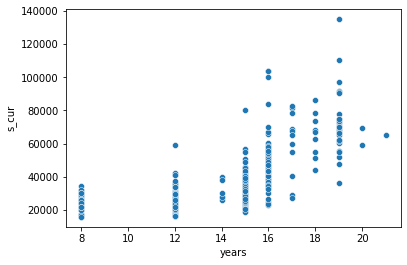

In [11]:
# Gehalt in Abhängigkeit von Jahren
sns.scatterplot(data=df, x= df.years, y=df.s_cur)

In [13]:
# Linear regression, OLS model

from scipy import stats
import statsmodels.api as sms

# initialize results 
results = []
for idx, param in enumerate(list(df.columns)):
    # variable parameter
    X = df[f'{param}']
    # constant term
    y = df.s_beg
    # add constant to model
    X = sms.add_constant(X)
    # define model
    model = sms.OLS(y, X)  
    #calculate model
    results.append(model.fit())
    # print rsquared for each parameter
    print(f'{idx}  ',f'{param:10}', results[idx].rsquared)

0   s_beg      1.0
1   s_cur      0.7746067532540755
2   jobcat     0.5695153958820321
3   years      0.4009367262263055
4   gender     0.20855262955907883
5   minority   0.024837045740578434


The R2 value is quite high for regression variable s_curr. Also the large condition number indicates a strong multicollinearity. Moreover, the current salary can not an be used as a describing variable when forecasting the starting salary as it lays in the future when applying for a job. 

In [14]:
# detailed summary for each parameter index 0 to 5
results[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  s_beg   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1622.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          8.20e-155
Time:                        23:20:54   Log-Likelihood:                -4571.2
No. Observations:                 474   AIC:                             9146.
Df Residuals:                     472   BIC:                             9155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3053.0955    386.925      7.891      0.000    2292.787    3813.404
s_cur          0.4057      0.010     40.276      0.000       0.386       0.425
==============================================================================
Omnibus:                      133.556   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1854.096
Skew:                           0.798   Prob(JB):                         0.00
Kurtosis:                      12.557   Cond. No.                     8.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Multi regression
# use all explanatory variables
import statsmodels.formula.api as smf
model = list(df.columns)[0] + ' ~ ' + ' + '.join(param for param in list(df.columns)[2:])


smf.ols(formula = model, data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  s_beg   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     238.9
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.09e-111
Time:                        23:20:54   Log-Likelihood:                -4660.9
No. Observations:                 474   AIC:                             9332.
Df Residuals:                     469   BIC:                             9353.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2683.2651   1041.887     -2.575      0.010   -4730.610    -635.921
jobcat      5472.5522    326.661     16.753      0.000    4830.652    6114.453
years        806.8280     86.508      9.327      0.000     636.836     976.820
gender      2404.9341    467.376      5.146      0.000    1486.524    3323.344
minority    -997.9117    516.467     -1.932      0.054   -2012.787      16.963
==============================================================================
Omnibus:                      449.107   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24041.659
Skew:                           3.907   Prob(JB):                         0.00
Kurtosis:                      37.003   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

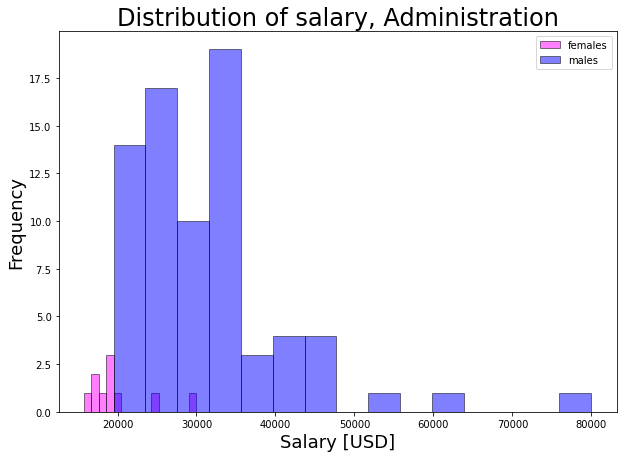

In [16]:
test = df.groupby(['jobcat','gender'])
test.get_group((3,0))
test.get_group((3,0)).s_beg.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7), bins=15)
test.get_group((3,1)).s_beg.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7), bins=15)

plt.legend(labels=['females','males'])
plt.title('Distribution of salary, Administration', size=24)
plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);

In [17]:
test2 = df.groupby(['jobcat'])

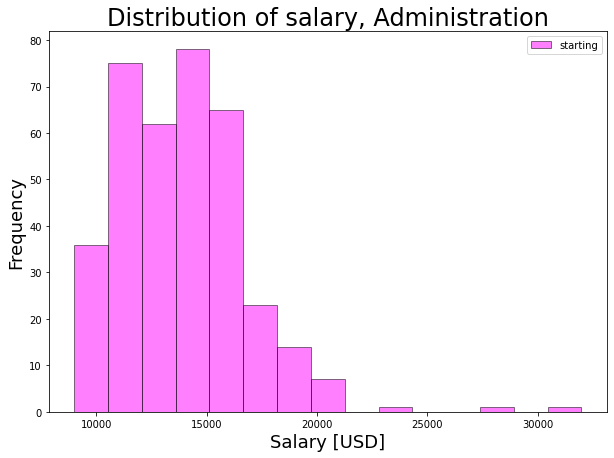

In [18]:
test2.get_group(1).s_beg.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7), bins=15)
#test2.get_group(1).s_cur.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7),bins=20)

plt.legend(labels=['starting'])
plt.title('Distribution of salary, Administration', size=24)
plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);


#test2.s_beg.plot(kind='hist',alpha=0.5)

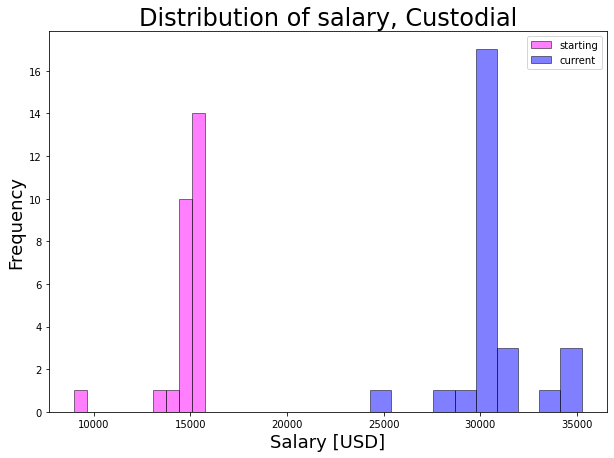

In [19]:
test2.get_group(2).s_beg.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
test2.get_group(2).s_cur.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
#test2.get_group(3).s_cur.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=['starting','current'])

#plt.legend(labels=['Admin', 'Custodial','Management'])
plt.title('Distribution of salary, Custodial', size=24)
plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);


#test2.s_beg.plot(kind='hist',alpha=0.5)

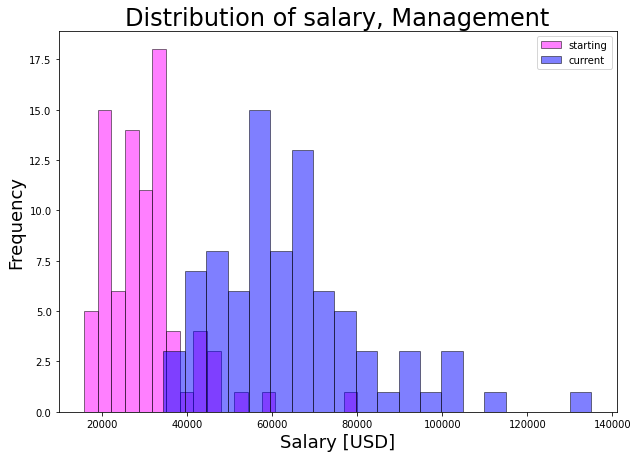

In [20]:
test2.get_group(3).s_beg.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7),bins=20)
test2.get_group(3).s_cur.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7),bins=20)
#test2.get_group(3).s_cur.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=['starting','current'])

#plt.legend(labels=['Admin', 'Custodial','Management'])
plt.title('Distribution of salary, Management', size=24)
plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);

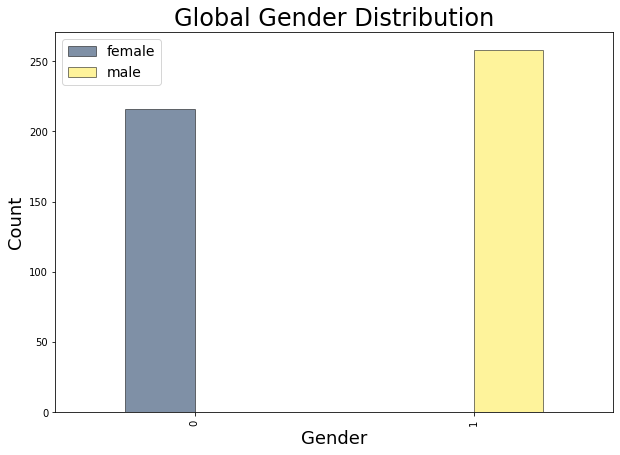

In [67]:
fig, ax = plt.subplots(figsize=(10,7))
df.groupby('gender')['gender'].value_counts().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')
plt.title("Global Gender Distribution", fontsize = 24)
plt.xlabel("Gender", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.legend(['female','male'],fontsize = 14);

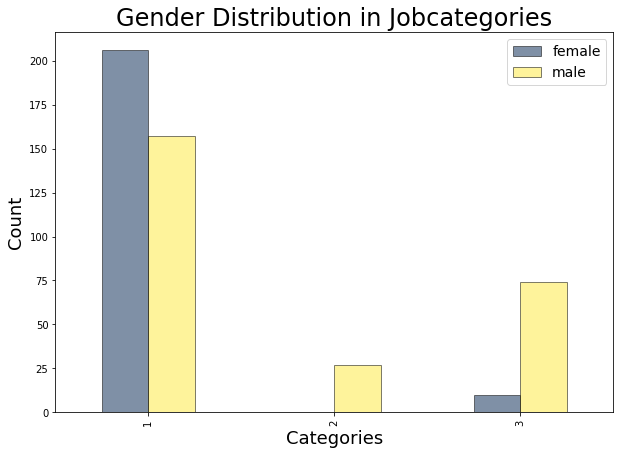

In [68]:
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['jobcat','gender'])['gender'].count().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')
plt.title("Gender Distribution in Jobcategories", fontsize = 24)
plt.xlabel("Categories", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.legend(['female','male'],fontsize=14)

In [45]:
df.groupby(['jobcat','gender'])['gender'].count()

jobcat  gender
1       0         206
        1         157
2       1          27
3       0          10
        1          74
Name: gender, dtype: int64

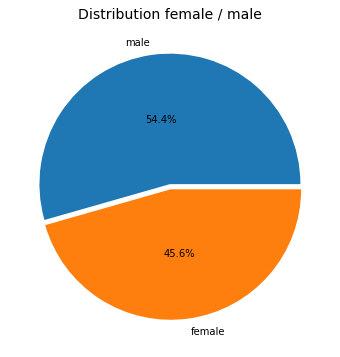

In [29]:
# Verteilung männlich/weiblich

gender = df.gender.value_counts()

#Using matplotlib

pie, ax = plt.subplots(figsize=[10,6])
labels = ['male','female']#gender.keys()
plt.pie(x=gender, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Distribution female / male", fontsize=14);
